# Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Datos

In [2]:
clientes = pd.DataFrame({"saldo" : [50000, 45000, 48000, 43500, 47000, 52000,
                                   20000, 26000,  25000, 23000, 21400, 18000,
                                   8000, 12000, 6000, 14500, 12600, 7000],
                         
                         "transacciones": [25, 20, 16, 23, 25, 18,
                                           23, 22, 24, 21, 27, 18, 
                                           8, 3, 6, 4, 9, 3]})

# Escalamiento de los Datos

In [3]:
scaler = MinMaxScaler().fit(clientes.values)

clientes =pd.DataFrame(scaler.transform(clientes.values),
                      columns=clientes.columns)

# Modelo

In [4]:
kmeans = KMeans(n_clusters=3).fit(clientes.values)
clientes["cluster"] = kmeans.labels_
clientes.head()

,saldo,transacciones,cluster
0,0.956522,0.916667,0
1,0.847826,0.708333,0
2,0.913043,0.541667,0
3,0.815217,0.833333,0
4,0.891304,0.916667,0


In [5]:
print(kmeans.cluster_centers_, kmeans.inertia_)

[[0.90398551 0.75694444]
 [0.08731884 0.10416667]
 [0.35289855 0.8125    ]] 0.3334968800322061


# Gráficas 

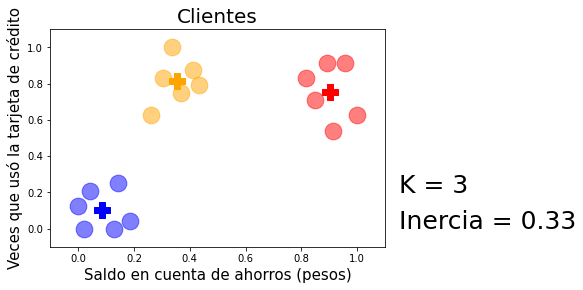

In [6]:
# plt.figure(figsize=(6,5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(clientes[clientes["cluster"]==cluster]["saldo"],
                clientes[clientes["cluster"]==cluster]["transacciones"],
                marker="o", s=280, color=colores[cluster], alpha=0.5)
    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores[cluster])
    
plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo en cuenta de ahorros (pesos)", fontsize=15)
plt.ylabel("Veces que usó la tarjeta de crédito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()


# Método del Codo

## Cálculo del número de Clústers (K)

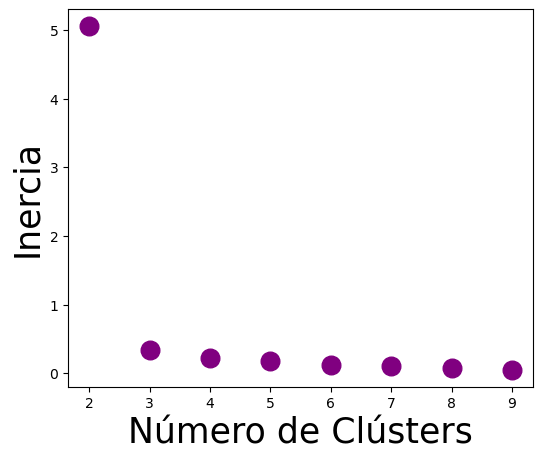

In [7]:
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(clientes.values)
    inercias.append(kmeans.inertia_)
    
plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2,10), inercias, marker='o', s=180, color="purple")
plt.xlabel("Número de Clústers", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()